In [1]:
import numpy as np
import statistics
import pandas as pd

class KNN:
    
    def __init__(self, k):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X_test, y_test, weighted=True):
        pred = [self._predict(x, weighted) for x in X_test]
        real = [y for y in y_test]
        accuracy = np.mean(np.array(pred) == np.array(real))
        return accuracy
    
    def _predict(self, x, weighted=True):
        d = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
        indices = np.argsort(d)[:self.k]
        y_label = [self.y_train[i] for i in indices]

        if weighted:
            # Calculate weights based on inverse distances
            weights = 1 / np.array(d)[indices]
            # Use a weighted voting scheme
            weighted_counts = {}
            for label, weight in zip(y_label, weights):
                weighted_counts[label] = weighted_counts.get(label, 0) + weight
            predicted_label = max(weighted_counts, key=weighted_counts.get)
        else:
            # Use the majority class without weighting
            predicted_label = statistics.mode(y_label)
            
        return predicted_label


In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Assuming 'Id' is a column in your DataFrame
df = df.set_index('Id')
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
X=np.array(df.iloc[:,0:4])
y=np.array(df.iloc[:,4])

In [7]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\shami\AppData\Local\Temp\ipykernel_32172\360660315.py:27: RuntimeWarning: divide by zero encountered in divide
  weights = 1 / np.array(d)[indices]


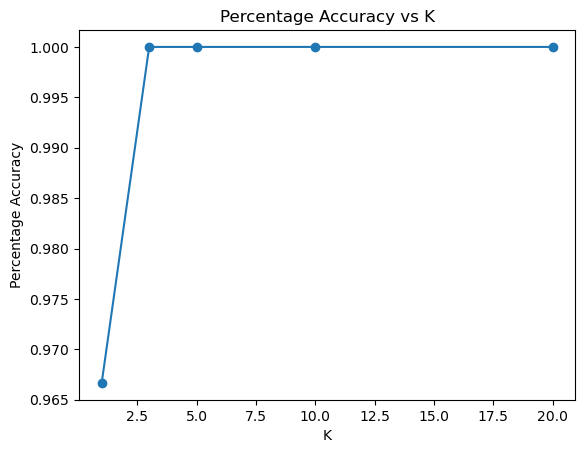

Best value of K: 3


In [13]:
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test are already defined

# Values of K to test
k_values = [1, 3, 5, 10, 20]

# Store accuracy for each K
accuracies = []

for k in k_values:
    # Create and train the KNN model
    knn_model = KNN(k)
    knn_model.fit(X_train, y_train)
    
    # Make predictions on the test data
    accuracy = knn_model.predict(X_test, y_test)
    
    accuracies.append(accuracy)

# Plot Percentage Accuracy vs K
plt.plot(k_values, accuracies, marker='o')
plt.title('Percentage Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Percentage Accuracy')
plt.show()

# Find the best value of K
best_k = k_values[np.argmax(accuracies)]
print(f"Best value of K: {best_k}")


In [16]:
model=KNN(best_k)

model.fit(X_train,y_train)

accuracy=model.predict(X_test,y_test,weighted=False)

accuracy

1.0

C:\Users\shami\AppData\Local\Temp\ipykernel_32172\360660315.py:27: RuntimeWarning: divide by zero encountered in divide
  weights = 1 / np.array(d)[indices]


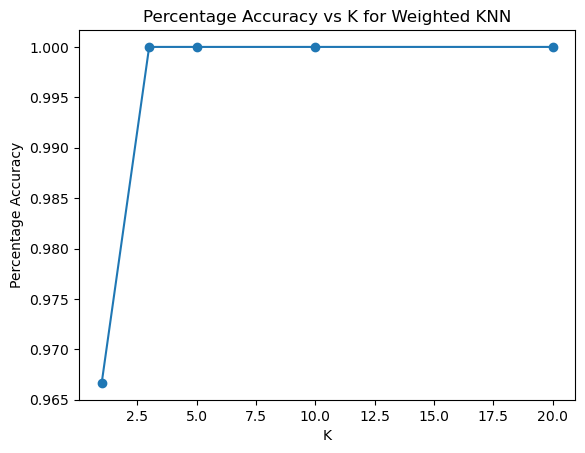

Best value of K for Weighted KNN: 3


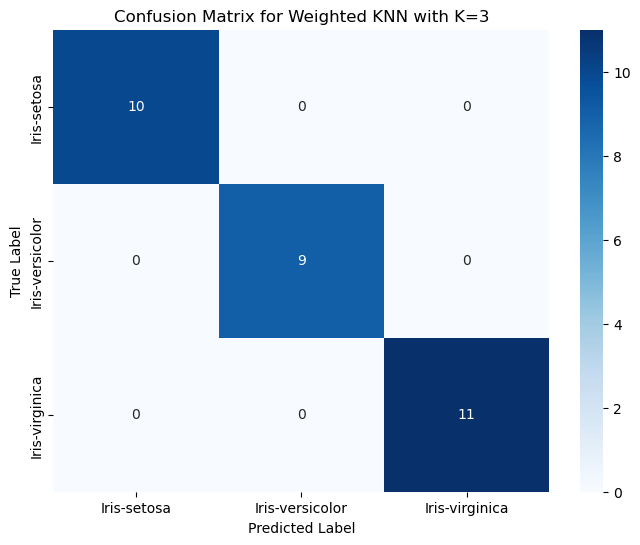

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming X_train, y_train, X_test, y_test are already defined
# Also, assuming the KNN class has been updated for weighted KNN as provided in the previous response

# Values of K to test
k_values = [1, 3, 5, 10, 20]

# Store accuracy for each K
accuracies_weighted = []

for k in k_values:
    # Create and train the KNN model with weighting
    knn_model_weighted = KNN(k)
    knn_model_weighted.fit(X_train, y_train)
    
    # Make predictions on the test data with weighting
    accuracy_weighted = knn_model_weighted.predict(X_test, y_test, weighted=True)
    
    accuracies_weighted.append(accuracy_weighted)

# Plot Percentage Accuracy vs K for weighted KNN
plt.plot(k_values, accuracies_weighted, marker='o')
plt.title('Percentage Accuracy vs K for Weighted KNN')
plt.xlabel('K')
plt.ylabel('Percentage Accuracy')
plt.show()

# Find the best value of K for weighted KNN
best_k_weighted = k_values[np.argmax(accuracies_weighted)]
print(f"Best value of K for Weighted KNN: {best_k_weighted}")

# Train the weighted KNN model with the best K
best_knn_model_weighted = KNN(best_k_weighted)
best_knn_model_weighted.fit(X_train, y_train)

# Make predictions on the test data with the best K
best_predictions_weighted = [best_knn_model_weighted._predict(x, weighted=True) for x in X_test]

# Create confusion matrix for weighted KNN
conf_matrix_weighted = confusion_matrix(y_test, best_predictions_weighted)

# Plot confusion matrix using seaborn for weighted KNN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_weighted, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title(f'Confusion Matrix for Weighted KNN with K={best_k_weighted}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [15]:
model=KNN(best_k_weighted)

model.fit(X_train,y_train)

accuracy=model.predict(X_test,y_test,weighted=True)

accuracy

C:\Users\shami\AppData\Local\Temp\ipykernel_32172\360660315.py:27: RuntimeWarning: divide by zero encountered in divide
  weights = 1 / np.array(d)[indices]


1.0